## Reading/Importing Data

In [1]:
# Pandas for managing datasets
import pandas as pd
# matplotlib for additional custom.
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns

In [2]:
# read dataset
df = pd.read_csv('data/Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Scatterplot

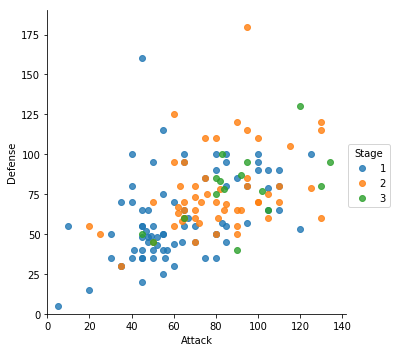

In [4]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

## Box Plot

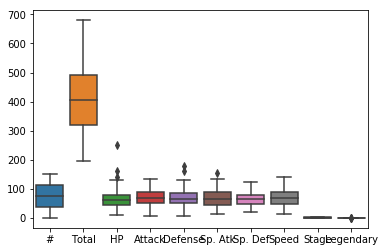

In [5]:
# Boxplot
sns.boxplot(data=df)

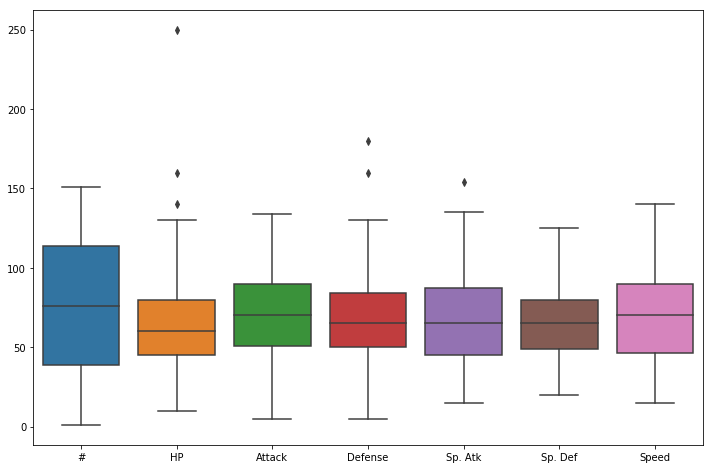

In [6]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
plt.figure(figsize=(12,8))
# New boxplot using stats_df
sns.boxplot(data=stats_df)

## Violin Plot

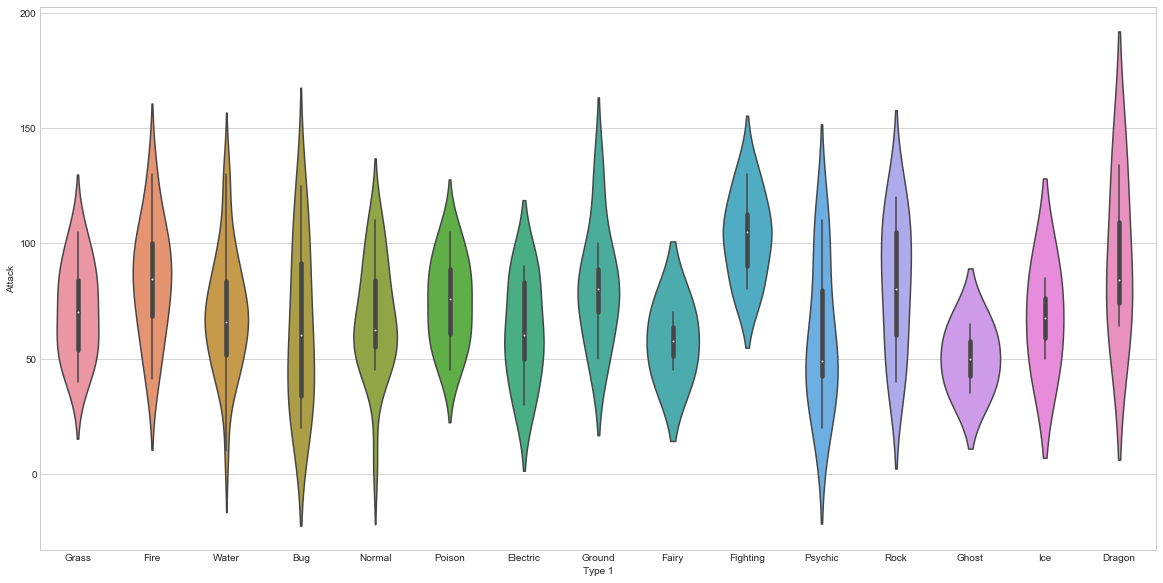

In [7]:
plt.figure(figsize=(20,10))
# Set theme
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [8]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

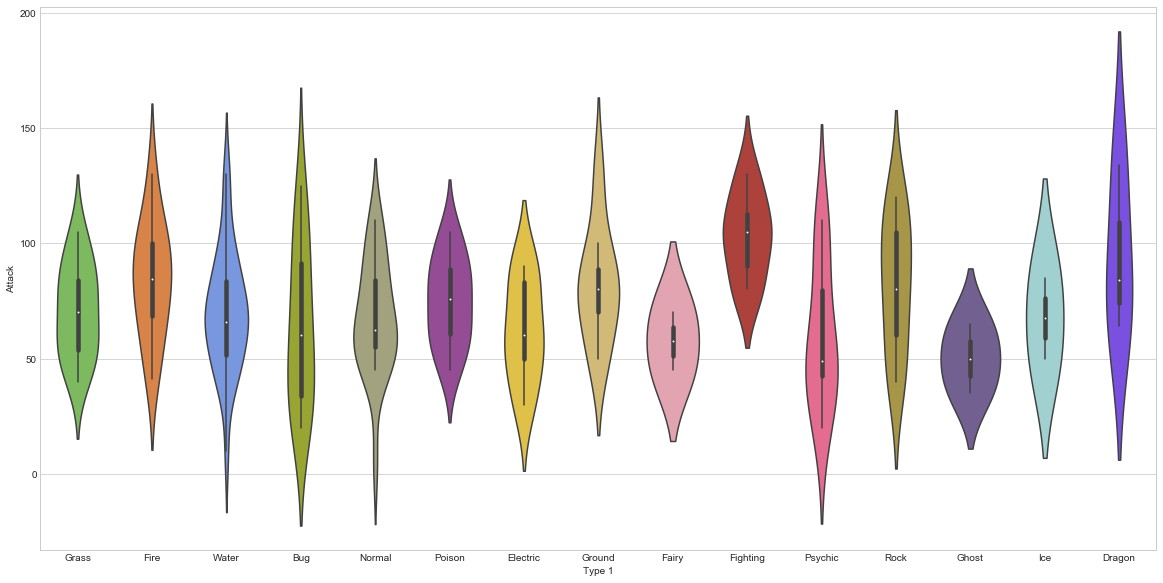

In [9]:
plt.figure(figsize=(20,10))
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

## Swarm Plot

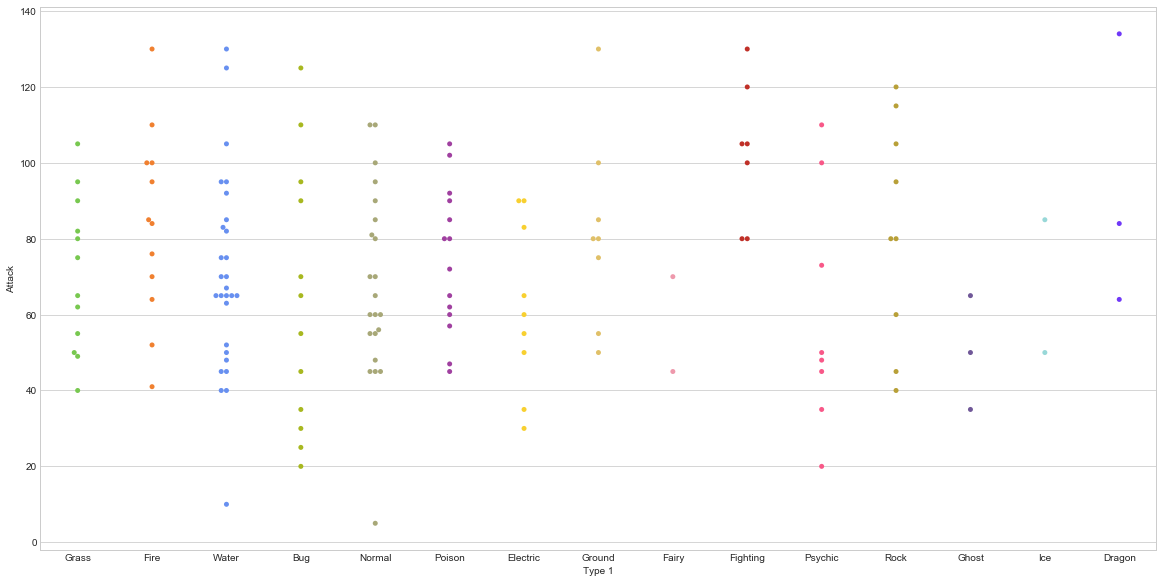

In [10]:
plt.figure(figsize=(20,10))
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

## Swarm/Violin Plot Combination

Text(0.5,1,'Attack by Type')

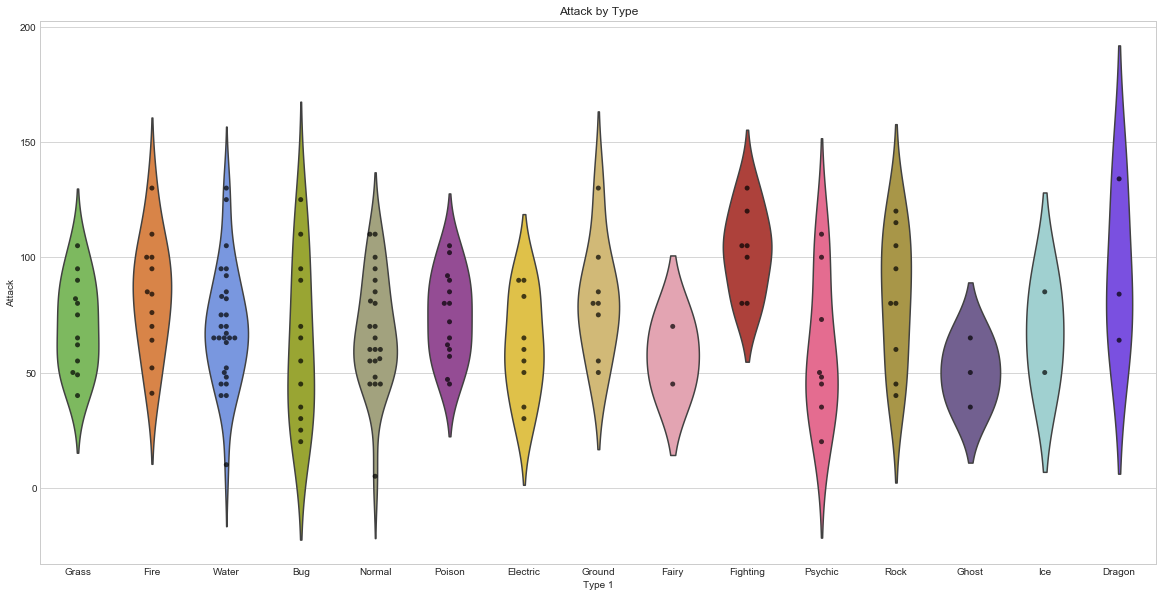

In [12]:
# Set figure size with matplotlib
plt.figure(figsize=(20,10))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

## Summary Swarmplot (all stats)

(151, 10)
(1057, 5)


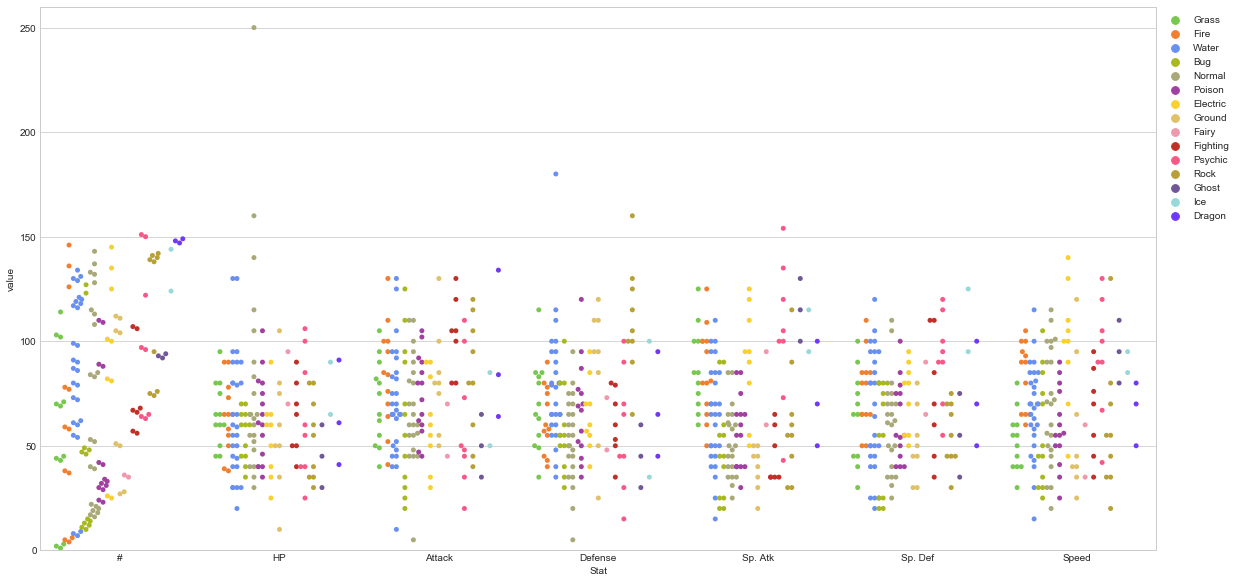

In [16]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

# Set figure size with matplotlib
plt.figure(figsize=(20,10))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Heatmaps
Visualize matrix-like data.

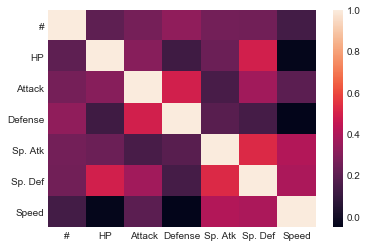

In [18]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)
plt.show()

## Histogram
Plot the distributions of numeric variables.

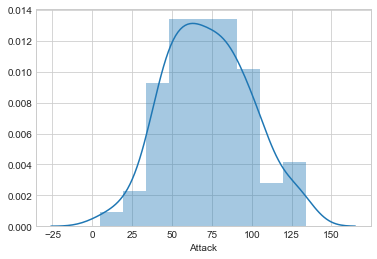

In [19]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

## Bar Plot
Visualize distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

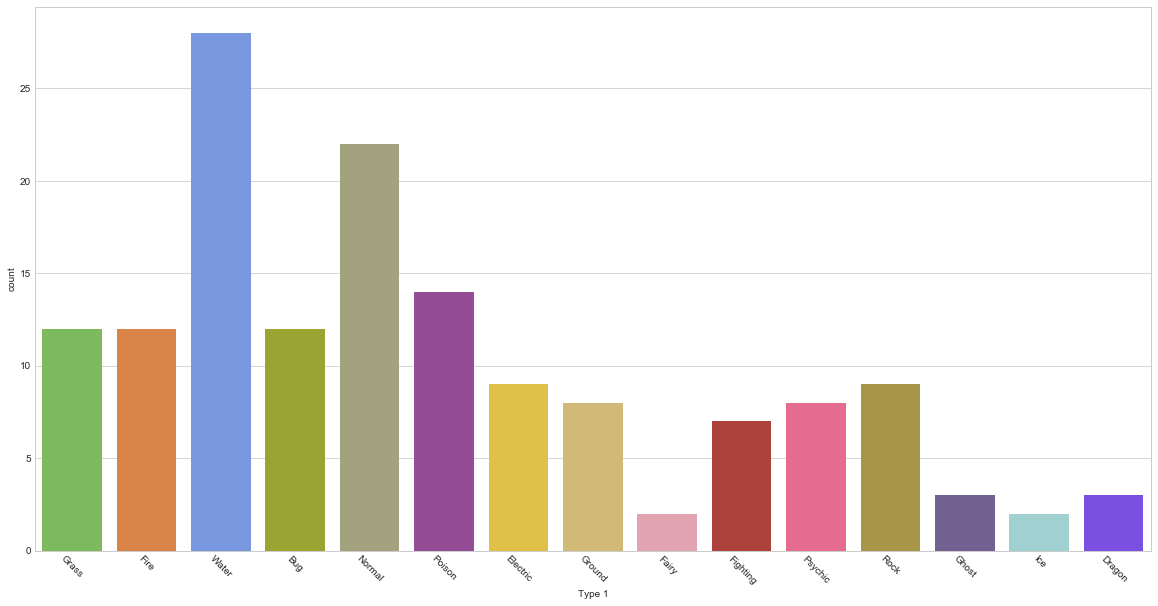

In [22]:
# size
plt.figure(figsize=(20,10))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Factor Plot
Seperate plots by categorical classes.

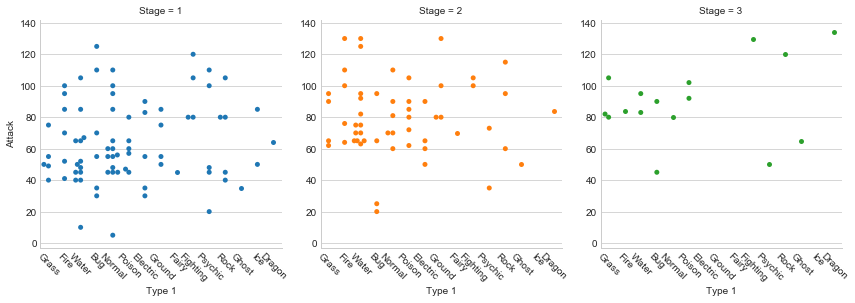

In [27]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

## Density Plot
Display distribution between two variables.

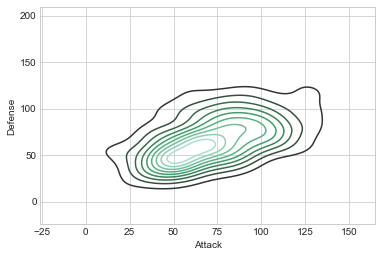

In [28]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

## Joint Distribution Plot
Combination of scatter plot and histograms.

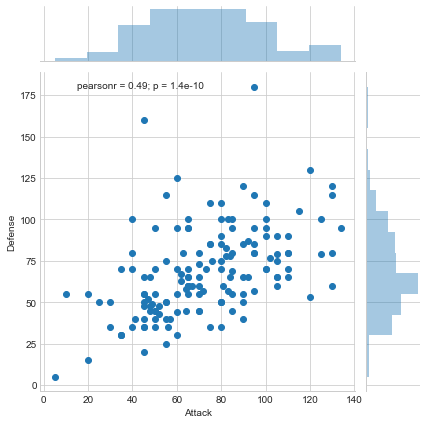

In [32]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)